In [3]:
#install.packages("data.table")
#install.packages("https://cran.r-project.org/src/contrib/Archive/lubridate/lubridate_1.7.4.tar.gz",repos=NULL)
#install.packages("ggplot2")
#install.packages("ggcorrplot")

In [4]:
library(data.table)
library(lubridate)
library(ggplot2)
library(ggcorrplot)

In [7]:
tourist <- read.csv("total_visit.csv") #Number of tourists visited Turkey in the respective month
usd <- read.csv("usd_try.csv") #Average USD/TRY exchange rate in the respective month
covid <- read.csv("covid19.csv") #Number of cases in Turkey in the respective month
google1 <- read.csv("holiday_turkey.csv") #Total number of google searchs in the world including 'holiday turkey' in the respective month
google2 <- read.csv("flight_turkey.csv") #Total number of google searchs in the world including 'flight turkey' in the respective month

In [8]:
setDT(tourist)
tourist[,year:=year(ym(date))]
yearly_visit = tourist[,list(total_visit = sum(total_visit)),list(year)]
yearly_visit
tourist[,month:=month(ym(date))]
tourist

year,total_visit
2016,25265406
2017,32079527
2018,38951902
2019,44712970
2020,12939344
2021,23940021


date,total_visit,year,month
2016-01,1296726,2016,1
2016-02,1183830,2016,2
2016-03,1533990,2016,3
2016-04,1667413,2016,4
2016-05,2329031,2016,5
2016-06,2334127,2016,6
2016-07,2733909,2016,7
2016-08,3642977,2016,8
2016-09,3089623,2016,9
2016-10,2730649,2016,10


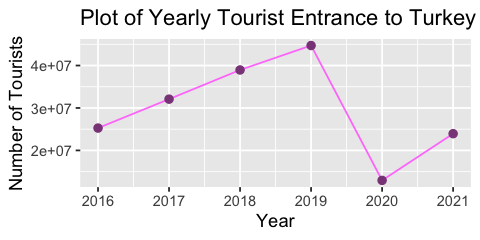

In [10]:
options(repr.plot.width = 4, repr.plot.height =2)
ggplot(yearly_visit, aes(x= year, y=total_visit))+
geom_line(color="orchid1")+
geom_point(colour="orchid4", size = 2)+
ggtitle("Plot of Yearly Tourist Entrance to Turkey") +
xlab("Year") + ylab("Number of Tourists")

Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”

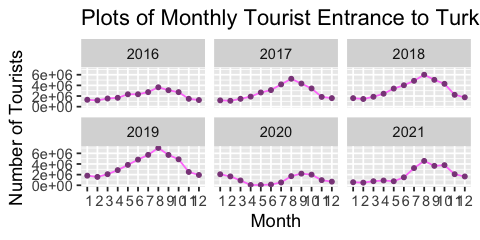

In [13]:
options(repr.plot.width = 4, repr.plot.height =2)
ggplot(tourist, aes(x= month, y=total_visit))+geom_line(color="orchid1")+geom_point(colour="orchid4", size = 1)+
facet_wrap(~year)+
scale_x_discrete(limits=c(1:12))+
ggtitle("Plots of Monthly Tourist Entrance to Turkey") +
xlab("Month") + ylab("Number of Tourists")

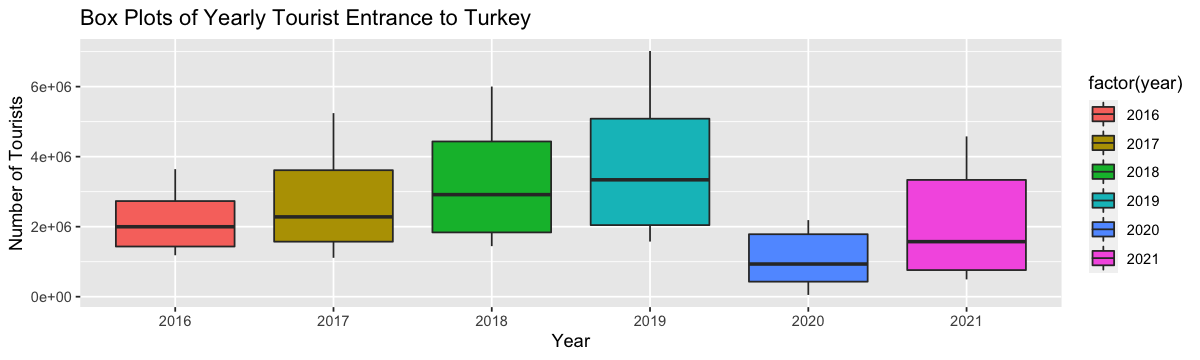

In [69]:
ggplot(tourist,aes(x=factor(year),y=total_visit)) + 
geom_boxplot(aes(fill = factor(year))) +
ggtitle("Box Plots of Yearly Tourist Entrance to Turkey") +
xlab("Year") + ylab("Number of Tourists")

In [14]:
setDT(usd)
usd[,year:=year(ym(date))]
yearly_rate = usd[,list(yearly_rate = mean(rate)),list(year)]
yearly_rate
usd[,month:=month(ym(date))]
usd

year,yearly_rate
2016,3.024167
2017,3.651667
2018,4.835000
2019,5.678333
2020,7.018333
2021,8.848333


date,rate,year,month
2016-01,3.01,2016,1
2016-02,2.95,2016,2
2016-03,2.90,2016,3
2016-04,2.84,2016,4
2016-05,2.93,2016,5
2016-06,2.92,2016,6
2016-07,2.96,2016,7
2016-08,2.97,2016,8
2016-09,2.97,2016,9
2016-10,3.07,2016,10


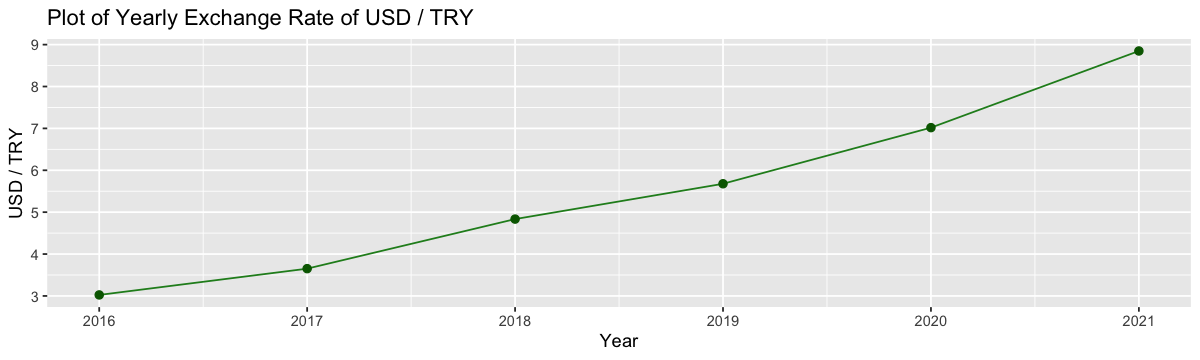

In [66]:
ggplot(yearly_rate, aes(x= year, y=yearly_rate))+
geom_line(color="forestgreen")+
geom_point(colour="darkgreen", size = 2)+
ggtitle("Plot of Yearly Exchange Rate of USD / TRY") +
xlab("Year") + ylab("USD / TRY")

Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”

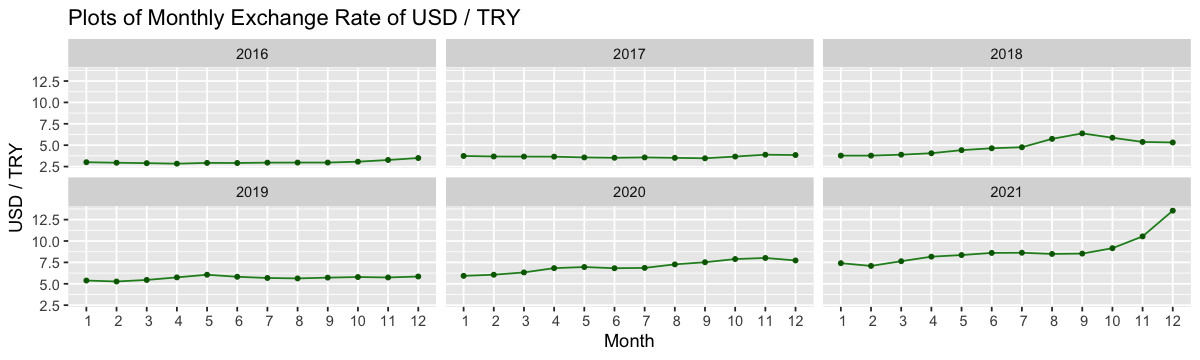

In [65]:
ggplot(usd, aes(x = month, y = rate))+geom_line(color="forestgreen")+geom_point(colour = "darkgreen", size = 1)+
facet_wrap(~year)+
scale_x_discrete(limits=c(1:12))+
ggtitle("Plots of Monthly Exchange Rate of USD / TRY") +
xlab("Month") + ylab("USD / TRY")


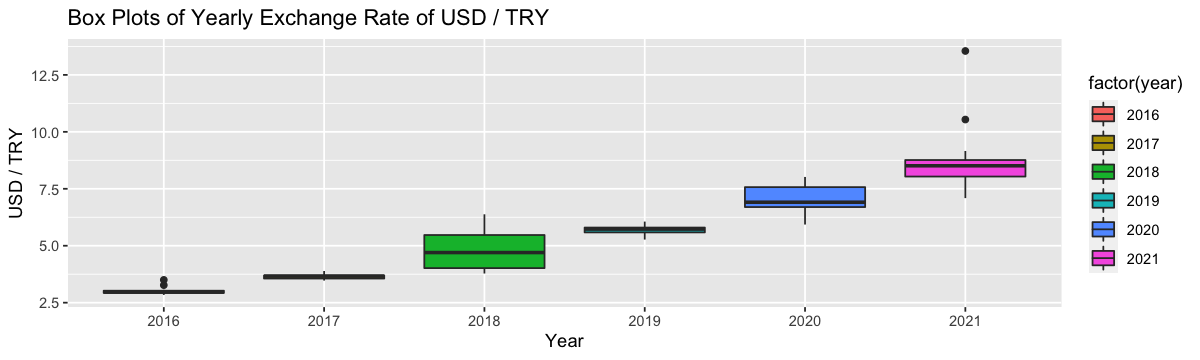

In [64]:
ggplot(usd,aes(x=factor(year),y=rate)) + 
geom_boxplot(aes(fill = factor(year)))+
ggtitle("Box Plots of Yearly Exchange Rate of USD / TRY") +
xlab("Year") + ylab("USD / TRY")

In [169]:
setDT(covid)
covid[,year:=year(ym(date))]
yearly_cases = covid[,list(yearly_cases = sum(case_number)),list(year)]
yearly_cases
covid[,month:=month(ym(date))]
covid

year,yearly_cases
2020,2194272
2021,7247492


date,case_number,year,month
2020-01,0,2020,1
2020-02,0,2020,2
2020-03,10827,2020,3
2020-04,106762,2020,4
2020-05,45514,2020,5
2020-06,35510,2020,6
2020-07,51468,2020,7
2020-08,247285,2020,8
2020-09,250626,2020,9
2020-10,264512,2020,10


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”

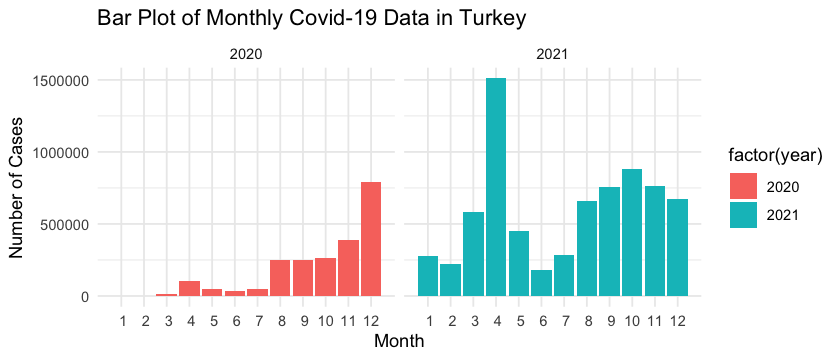

In [170]:
ggplot(covid, aes(x = month, y=case_number)) + 
geom_bar(stat='identity', aes(fill = factor(year))) + facet_wrap(~year)+
scale_x_discrete(limits=c(1:12))+
ggtitle("Bar Plot of Monthly Covid-19 Data in Turkey") +
xlab("Month") + ylab("Number of Cases")


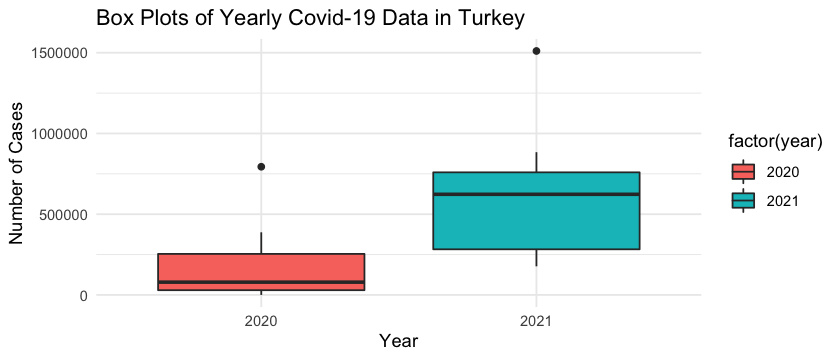

In [171]:
ggplot(covid,aes(x=factor(year),y=case_number)) + geom_boxplot(aes(fill = factor(year)))+
ggtitle("Box Plots of Yearly Covid-19 Data in Turkey") +
xlab("Year") + ylab("Number of Cases")


In [88]:
setDT(google1)
google1[,year:=year(ym(date))]
yearly_search1 = google1[,list(yearly_search1 = sum(holiday_turkey)),list(year)]
yearly_search1
google1[,month:=month(ym(date))]
google1

year,yearly_search1
2016,497
2017,556
2018,519
2019,657
2020,416
2021,374


date,holiday_turkey,year,month
2016-01,15,2016,1
2016-02,26,2016,2
2016-03,16,2016,3
2016-04,35,2016,4
2016-05,67,2016,5
2016-06,76,2016,6
2016-07,75,2016,7
2016-08,60,2016,8
2016-09,44,2016,9
2016-10,46,2016,10


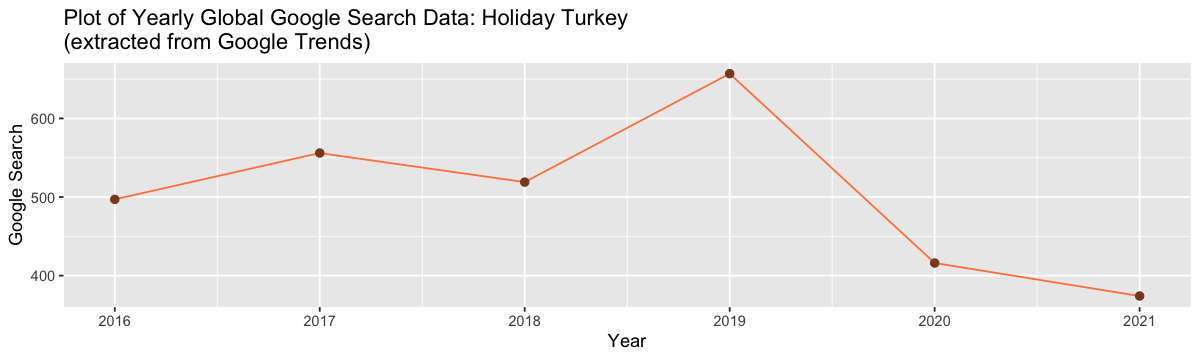

In [89]:
ggplot(yearly_search1, aes(x= year, y=yearly_search1))+
geom_line(color="sienna1")+
geom_point(colour="sienna4", size = 2)+
ggtitle("Plot of Yearly Global Google Search Data: Holiday Turkey \n(extracted from Google Trends)") +
xlab("Year") + ylab("Google Search")


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”

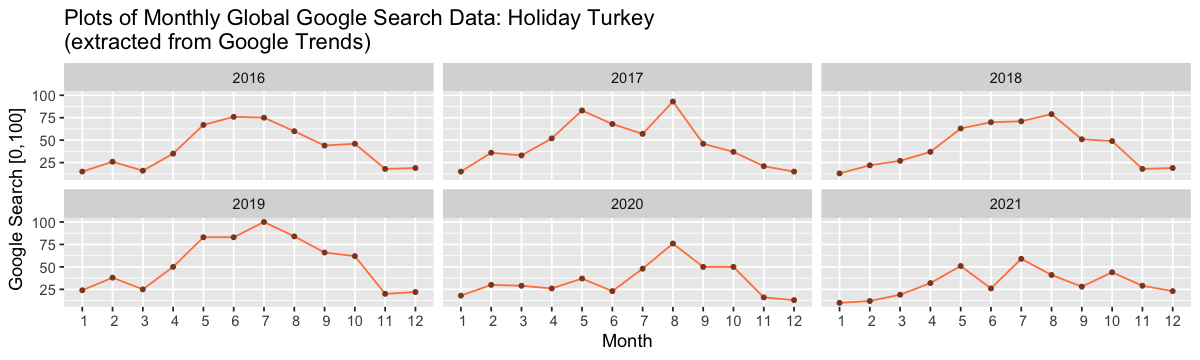

In [90]:
options(repr.plot.width = 10, repr.plot.height =3)
ggplot(google1, aes(x = month, y = holiday_turkey))+
geom_line(color="sienna1")+geom_point(colour = "sienna4", size = 1)+
facet_wrap(~year)+
scale_x_discrete(limits=c(1:12))+
ggtitle("Plots of Monthly Global Google Search Data: Holiday Turkey \n(extracted from Google Trends)") +
xlab("Month") + ylab("Google Search [0,100]")

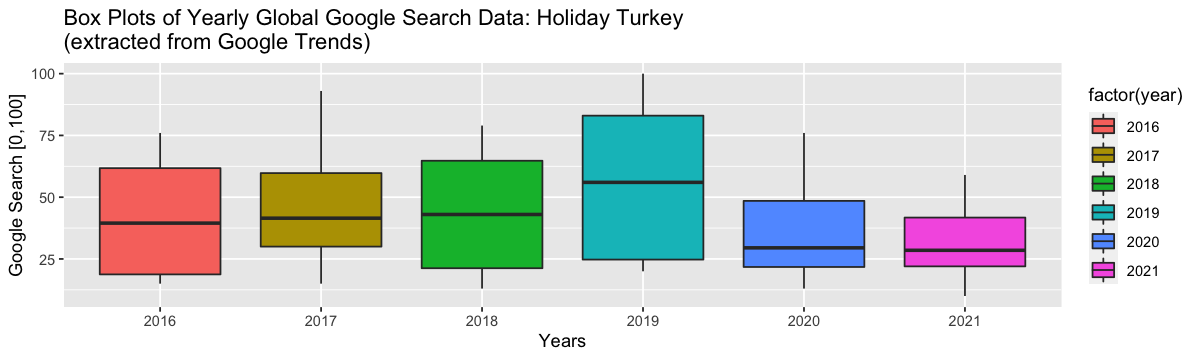

In [92]:
ggplot(google1,aes(x=factor(year),y=holiday_turkey)) + 
geom_boxplot(aes(fill = factor(year))) + 
ggtitle("Box Plots of Yearly Global Google Search Data: Holiday Turkey \n(extracted from Google Trends)") +
xlab("Years") + ylab("Google Search [0,100]")


In [93]:
setDT(google2)
google2[,year:=year(ym(date))]
yearly_search2 = google2[,list(yearly_search2 = sum(flight_turkey)),list(year)]
yearly_search2
google2[,month:=month(ym(date))]
google2

year,yearly_search2
2016,524
2017,563
2018,774
2019,902
2020,630
2021,709


date,flight_turkey,year,month
2016-01,39,2016,1
2016-02,37,2016,2
2016-03,36,2016,3
2016-04,36,2016,4
2016-05,46,2016,5
2016-06,58,2016,6
2016-07,88,2016,7
2016-08,41,2016,8
2016-09,36,2016,9
2016-10,36,2016,10


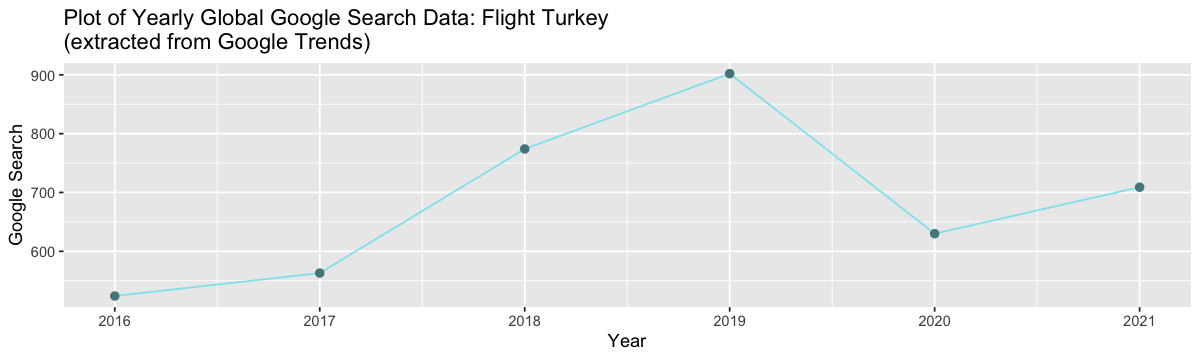

In [103]:
ggplot(yearly_search2, aes(x= year, y=yearly_search2))+
geom_line(color="cadetblue2")+
geom_point(colour="cadetblue4", size = 2)+
ggtitle("Plot of Yearly Global Google Search Data: Flight Turkey \n(extracted from Google Trends)") +
xlab("Year") + ylab("Google Search")


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”

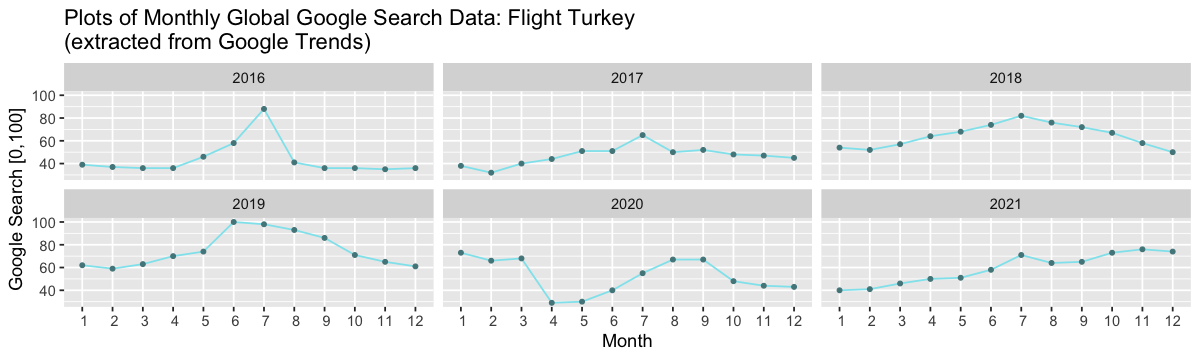

In [99]:
options(repr.plot.width = 10, repr.plot.height =3)
ggplot(google2, aes(x = month, y = flight_turkey))+
geom_line(color="cadetblue2")+geom_point(colour = "cadetblue4", size = 1)+
facet_wrap(~year)+
scale_x_discrete(limits=c(1:12))+
ggtitle("Plots of Monthly Global Google Search Data: Flight Turkey \n(extracted from Google Trends)") +
xlab("Month") + ylab("Google Search [0,100]")

ERROR while rich displaying an object: Error in unique.default(x, nmax = nmax): unique() sadece vektörler için geçerlidir

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)


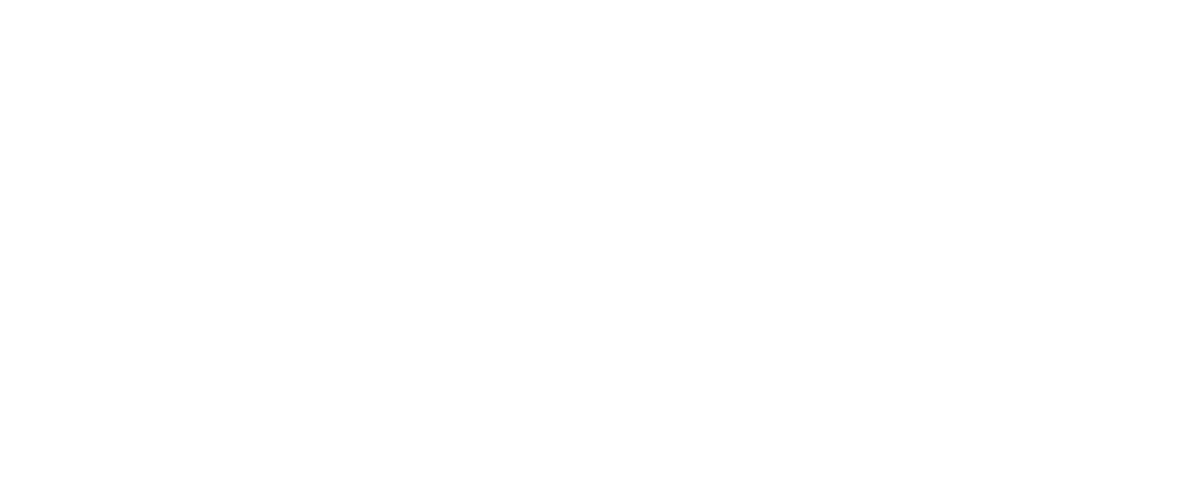

In [53]:
ggplot(google2,aes(x=factor(year),y=flight_turkey)) + 
geom_boxplot(aes(fill = factor(year))) + 
ggtitle("Box Plots of Yearly Global Google Search Data: Flight Turkey \n(extracted from Google Trends)") +
xlab("Years") + ylab("Google Search [0,100]")

In [30]:
merged1 <- merge(tourist, usd, by = "date", all.x=TRUE)
merged2 <- merge(google1, google2, by = "date", all.x=TRUE)
merged3 <- merge(merged1, merged2, by = "date", all.x=TRUE)
merged <- merge(merged3, covid, by = "date", all.x=TRUE)
#str(merged)
df = subset(merged, select = -c(year, month) )
setDT(df)
na_index = which(is.na(df$case_number))
df[na_index,"case_number"] = 0
#df[,year_of_date := year(ym(date))]
df
str(df)

date,total_visit,rate,holiday_turkey,flight_turkey,case_number
2016-01,1296726,3.01,15,39,0
2016-02,1183830,2.95,26,37,0
2016-03,1533990,2.90,16,36,0
2016-04,1667413,2.84,35,36,0
2016-05,2329031,2.93,67,46,0
2016-06,2334127,2.92,76,58,0
2016-07,2733909,2.96,75,88,0
2016-08,3642977,2.97,60,41,0
2016-09,3089623,2.97,44,36,0
2016-10,2730649,3.07,46,36,0


Classes ‘data.table’ and 'data.frame':	72 obs. of  6 variables:
 $ date          : Factor w/ 72 levels "2016-01","2016-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ total_visit   : int  1296726 1183830 1533990 1667413 2329031 2334127 2733909 3642977 3089623 2730649 ...
 $ rate          : num  3.01 2.95 2.9 2.84 2.93 2.92 2.96 2.97 2.97 3.07 ...
 $ holiday_turkey: int  15 26 16 35 67 76 75 60 44 46 ...
 $ flight_turkey : int  39 37 36 36 46 58 88 41 36 36 ...
 $ case_number   : int  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr "date"


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”

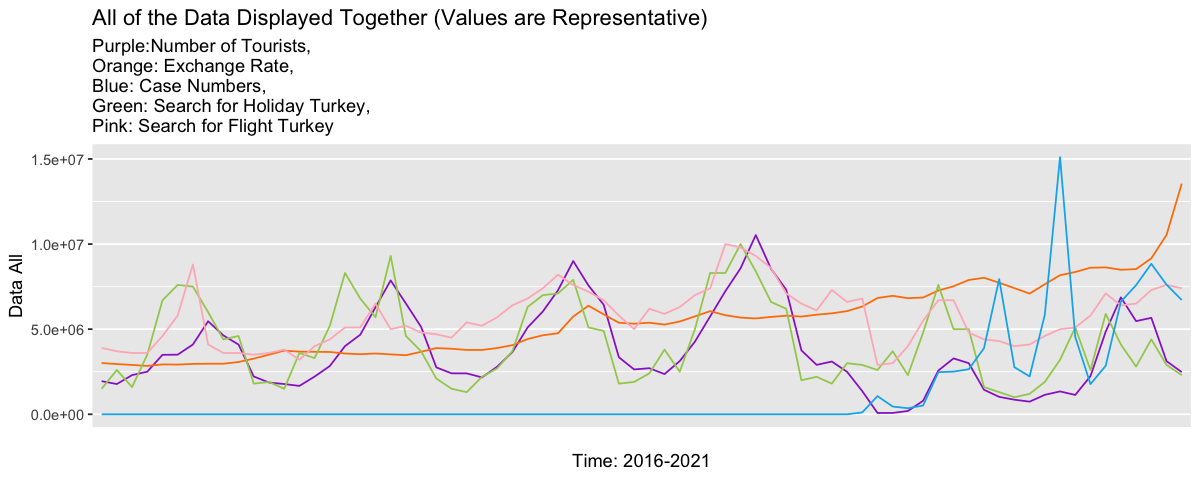

In [52]:
options(repr.plot.width = 10, repr.plot.height =4)
ggplot(df, aes(x = as.numeric(date)))+
       geom_line(aes(y = 1.5*total_visit), color = "darkorchid3")+
       geom_line(aes(y = 1000000*rate), color = "darkorange1")+
       geom_line(aes(y = 100000*holiday_turkey), color = "darkolivegreen3")+
       geom_line(aes(y = 100000*flight_turkey), color = "lightpink")+
       geom_line(aes(y = 10*case_number), color = "deepskyblue2")+
scale_x_discrete(limits=c(2016,2017,2018,2019,2020,2021))+
ggtitle("All of the Data Displayed Together (Values are Representative)", subtitle = "Purple:Number of Tourists, \nOrange: Exchange Rate, \nBlue: Case Numbers, \nGreen: Search for Holiday Turkey, \nPink: Search for Flight Turkey") +
xlab("Time: 2016-2021") + ylab("Data All")

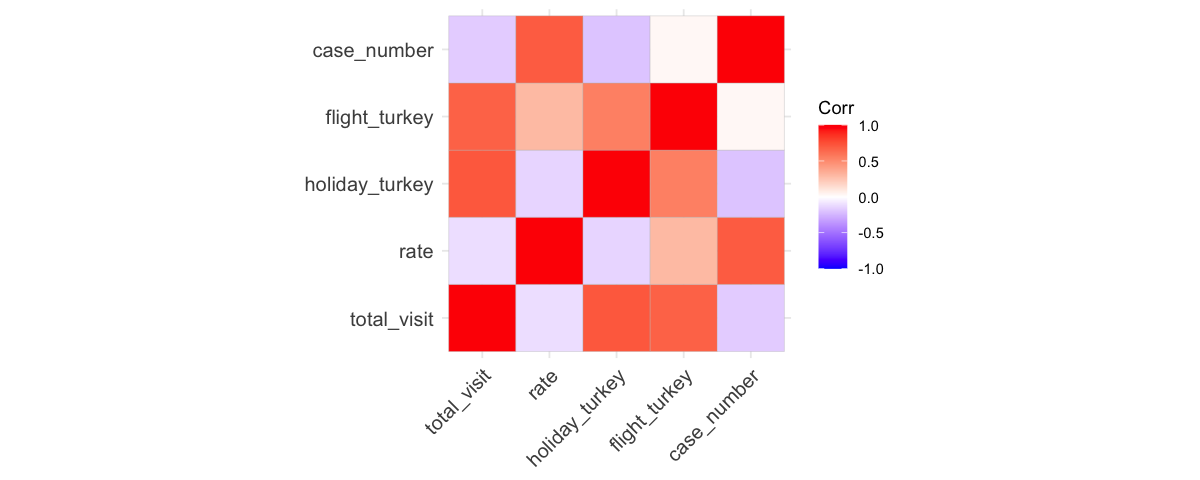

In [40]:
options(repr.plot.width = 10, repr.plot.height =4)
ggcorrplot(cor(df[,-1]))